## Installing Dependencies

In [1]:
! pip install calplot

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import calplot
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Converting CSV to Pandas Dataframes

In [3]:
# reading csv file
cal=pd.read_csv(r'/content/drive/MyDrive/data/calendar.csv')
prices=pd.read_csv(r'/content/drive/MyDrive/data/sell_prices.csv')
salvs=pd.read_csv(r'/content/drive/MyDrive/data/sales_train_validation.csv')

In [6]:
#@title Downcasting Fucntion
#https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling/notebook#2.-Downcasting

def downcast(df):

    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()

    for i,t in enumerate(types):

        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)

        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)

        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')

    return df  

In [7]:
#Downcasting Calendar and price
cal=downcast(cal)
price=downcast(prices)

In [ ]:
salvs=downcast(salvs)
#Converting dataframe from wide form to long form
sale_val = pd.melt(salvs, id_vars=[a for a in salvs.columns if a.find("id")!=-1],
                           value_vars=[a for a in salvs.columns if a.find("d_")==0], var_name='d', value_name='sales')


#Merging Cal,Price,Salvs
df_melt =pd.merge(sale_val, cal, on='d', how='left')
df = pd.merge(df_melt, prices, on=['store_id','item_id','wm_yr_wk'], how='left')

#Converting column d from  categorical type to numerical value
df['d'] = df_melt['d'].apply(lambda a: a.split('_')[1]).astype(np.int16)
sale_val['d'] = sale_val['d'].apply(lambda a: a.split('_')[1]).astype(np.int16)

#Downcasting sale_val and df
sale_val=downcast(sale_val)
df=downcast(df)

##General Colum Analysis of Dataframes

### General Column Analysis : Calendar dataframe

Column Info

In [ ]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int16         
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   int8          
 4   month         1969 non-null   int8          
 5   year          1969 non-null   int16         
 6   d             1969 non-null   category      
 7   event_name_1  162 non-null    category      
 8   event_type_1  162 non-null    category      
 9   event_name_2  5 non-null      category      
 10  event_type_2  5 non-null      category      
 11  snap_CA       1969 non-null   int8          
 12  snap_TX       1969 non-null   int8          
 13  snap_WI       1969 non-null   int8          
dtypes: category(6), datetime64[ns](1), int16(2), int8(5)
memory usage: 144.0 KB


The calendar file has 14 columns and 1969 rows

Starting date = 2011-01-29 , date_format=yyyy-mm-dd , End date = 2016-06-19

Year span = 2011 to 2016 (6 Years)

SNAP - It stands for the **Supplemental Nutrition Assistance Program**. SNAP is a federal program that helps millions of low-income Americans put food on the table.

Column Analysis

In [ ]:
#Printing unique column values and length of list of unique values
print(cal['date'].unique(),len(cal['date'].unique()))
print(cal['weekday'].unique(),len(cal['weekday'].unique()))
print(cal['wday'].unique(),len(cal['wday'].unique()))
print(cal['month'].unique(),len(cal['month'].unique()))
print(cal['year'].unique(),len(cal['year'].unique()))
print(cal['event_name_1'].unique(),len(cal['event_name_1'].unique()))
print(cal['event_type_1'].unique(),len(cal['event_type_1'].unique()))
print(cal['event_name_2'].unique(),len(cal['event_name_2'].unique()))
print(cal['event_type_2'].unique(),len(cal['event_type_2'].unique()))

['2011-01-29T00:00:00.000000000' '2011-01-30T00:00:00.000000000'
 '2011-01-31T00:00:00.000000000' ... '2016-06-17T00:00:00.000000000'
 '2016-06-18T00:00:00.000000000' '2016-06-19T00:00:00.000000000'] 1969
['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 7
[1 2 3 4 5 6 7] 7
[ 1  2  3  4  5  6  7  8  9 10 11 12] 12
[2011 2012 2013 2014 2015 2016] 6
[NaN, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart', ..., 'Chanukah End', 'NewYear', 'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter']
Length: 31
Categories (30, object): ['SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart', ..., 'NewYear',
                          'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'] 31
[NaN, 'Sporting', 'Cultural', 'National', 'Religious']
Categories (4, object): ['Sporting', 'Cultural', 'National', 'Religious'] 5
[NaN, 'Easter', 'Cinco De Mayo', 'Ortho

Description of each column
Date:- Each date is unique and non-repetitive with no NaN value

Weekday:- All seven week day are present in categorical fashion as ordinal feature

wday:- numerically encoded weekday with value between 1 to 7

Month:- numerically encoded moth with value between 1 to 12

Year:- year as category in ordinal fashion

event_name_1:- 30 unique event and NaN as categorical feature

event_type_1:- 4 unique event type and NaN as categorical feature 'Sporting', 'Cultural', 'National', 'Religious'

event_name_2:- 4 unique event and NaN as categorical feature

event_type_2:- 2 unique event type and NaN as categorical feature 'Sporting', 'Cultural', 'National', 'Religious'

### General Column Analysis : Price dataframe

Column Info

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    int16   
 3   sell_price  float16 
dtypes: category(2), float16(1), int16(1)
memory usage: 45.8 MB


Their are 4 columns and 6841121 rows with

two categorical type column(store_id,item_id)and

two numerical type column(wm_yr_wk,sell_price)

Column Analysis

In [ ]:
#Printing unique column values and length of list of unique values
print(price['store_id'].unique(),len(price['store_id'].unique()))
print(price['item_id'].unique(),len(price['item_id'].unique()))
print(price['wm_yr_wk'].unique(),len(price['wm_yr_wk'].unique()))
print(price['sell_price'].unique(),len(price['sell_price'].unique()))

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3'] 10
['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', 'HOBBIES_1_004', 'HOBBIES_1_005', ..., 'FOODS_3_823', 'FOODS_3_824', 'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827']
Length: 3049
Categories (3049, object): ['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', 'HOBBIES_1_004', ...,
                            'FOODS_3_824', 'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'] 3049
[11325 11326 11327 11328 11329 11330 11331 11332 11333 11334 11335 11336
 11337 11338 11339 11340 11341 11342 11343 11344 11345 11346 11347 11348
 11349 11350 11351 11352 11353 11401 11402 11403 11404 11405 11406 11407
 11408 11409 11410 11411 11412 11413 11414 11415 11416 11417 11418 11419
 11420 11421 11422 11423 11424 11425 11426 11427 11428 11429 11430 11431
 11432 11433 11434 11435 11436 11437 11438 11439 11440 11441 11442 11443
 11444 114

Their are 10 stores in the dataset of which 4 are from california and 3 from texas and wisconsin each.

Their are 3049 unique products

Also the unique weeks are counted to 282

And the prices have 1045 unique value

### General Column Analysis : Sale_val dataframe

Column Info

In [ ]:
sale_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   d         int16   
 7   sales     int16   
dtypes: category(6), int16(2)
memory usage: 669.1 MB


Column Analysis

In [ ]:
#Printing unique column values and length of list of unique values
print(sale_val['id'].unique(),len(sale_val['id'].unique()))
print(sale_val['item_id'].unique(),len(sale_val['item_id'].unique()))
print(sale_val['dept_id'].unique(),len(sale_val['dept_id'].unique()))
print(sale_val['cat_id'].unique(),len(sale_val['cat_id'].unique()))
print(sale_val['store_id'].unique(),len(sale_val['store_id'].unique()))
print(sale_val['state_id'].unique(),len(sale_val['state_id'].unique()))
print(sale_val['d'].unique(),len(sale_val['d'].unique()))
print(sale_val['sales'].unique(),len(sale_val['sales'].unique()))

['HOBBIES_1_001_CA_1_validation', 'HOBBIES_1_002_CA_1_validation', 'HOBBIES_1_003_CA_1_validation', 'HOBBIES_1_004_CA_1_validation', 'HOBBIES_1_005_CA_1_validation', ..., 'FOODS_3_823_WI_3_validation', 'FOODS_3_824_WI_3_validation', 'FOODS_3_825_WI_3_validation', 'FOODS_3_826_WI_3_validation', 'FOODS_3_827_WI_3_validation']
Length: 30490
Categories (30490, object): ['HOBBIES_1_001_CA_1_validation', 'HOBBIES_1_002_CA_1_validation',
                             'HOBBIES_1_003_CA_1_validation', 'HOBBIES_1_004_CA_1_validation', ...,
                             'FOODS_3_824_WI_3_validation', 'FOODS_3_825_WI_3_validation',
                             'FOODS_3_826_WI_3_validation', 'FOODS_3_827_WI_3_validation'] 30490
['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', 'HOBBIES_1_004', 'HOBBIES_1_005', ..., 'FOODS_3_823', 'FOODS_3_824', 'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827']
Length: 3049
Categories (3049, object): ['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', 'HOBBIES_1_004', ..

There are 3049 items and since their are 10 stores in 3 states so total unique id are 30490.

There are 7 department for each category i.e. 3 for Food and 2 each for Household and Hobbies

Their are 3 states California(4 store),Texas(3 store),Wisconsin(3 store)

The list of unique quantities of each item sold each day has minimum sales of 0 and a maximum quantity of 763 of an item sold in a day by walmart including all three states

## Bivariate Analysis of Dataframes

### Bivariate Analysis : Cal dataframe 

How are snap days are assigned in each state across the years?

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x734.4 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3c7f03350>,
       dtype=object))

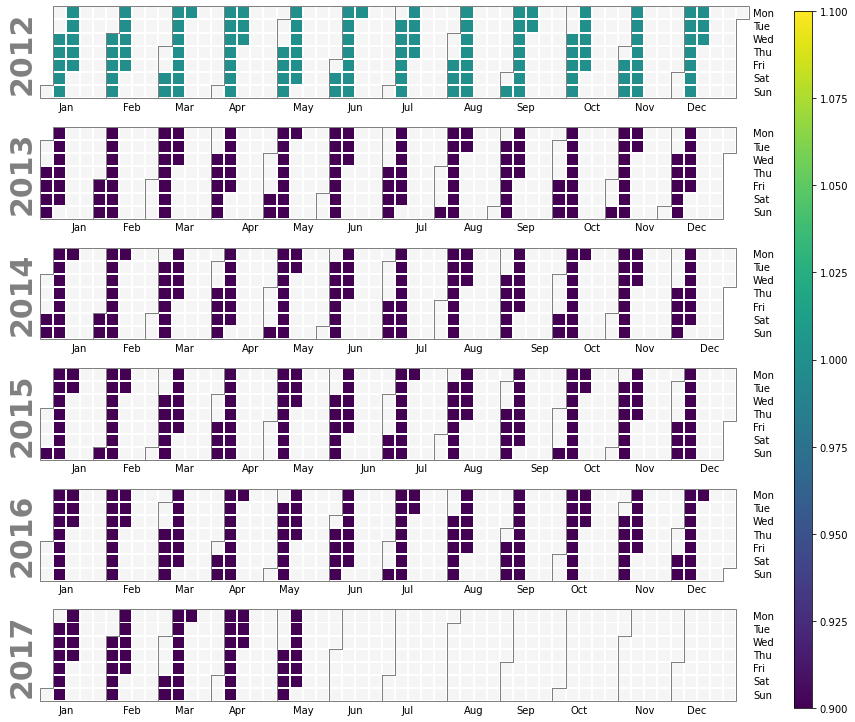

In [ ]:
# For California
all_day=pd.date_range('01/01/2012', periods=1969, freq='D') # list of dates within a range
day = np.array(all_day) #conveting list to array
event=pd.Series(np.array(cal['snap_CA'].to_list()),index=day) # storing SNAP and non-SNAP day respectively 
calplot.calplot(event,vmin=1, vmax=1) # plotting calendar heatmap

Answer : In California any consecutive 10 days but there is a alteration of pattern with following conditions which are

Every month with 31 days will have the pattern 3 days except for january due to 1st jan being Newyear holiday it is moved one day ahead except 2013 and 2017 it was one day back.

For month with 30 day the pattern will follow after first day.

For February it always start from the 1st of feb

(<Figure size 900x734.4 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4a8c12490>,
       dtype=object))

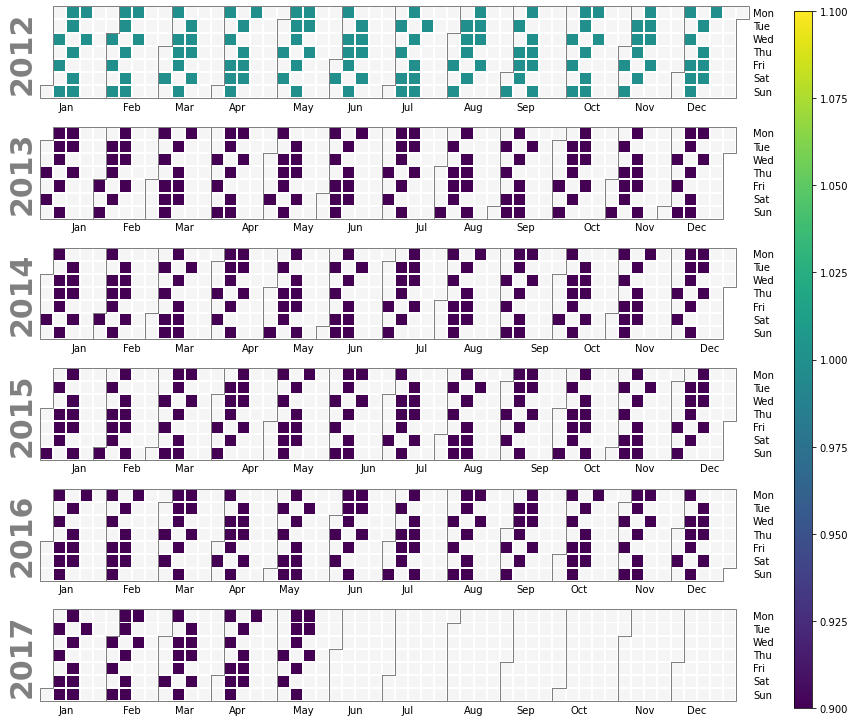

In [ ]:
# For Texas
event=pd.Series(np.array(cal['snap_TX'].to_list()),index=day) # storing SNAP and non-SNAP day respectively 
calplot.calplot(event,vmin=1, vmax=1) # plotting calendar heatmap

Answer:In texas Every (1,3,5,6,7,9,11,12,13,15)10 days of the month are reserved for SNAP but there is a alteration of pattern with following conditions which are

Every month with 31 days will have the pattern 2 days except for january due to 1st jan being Newyear holiday.

For month with 30 day the pattern will follow after first 3 days.

For February it always start from the 1st of feb

(<Figure size 900x734.4 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4a89c4b90>,
       dtype=object))

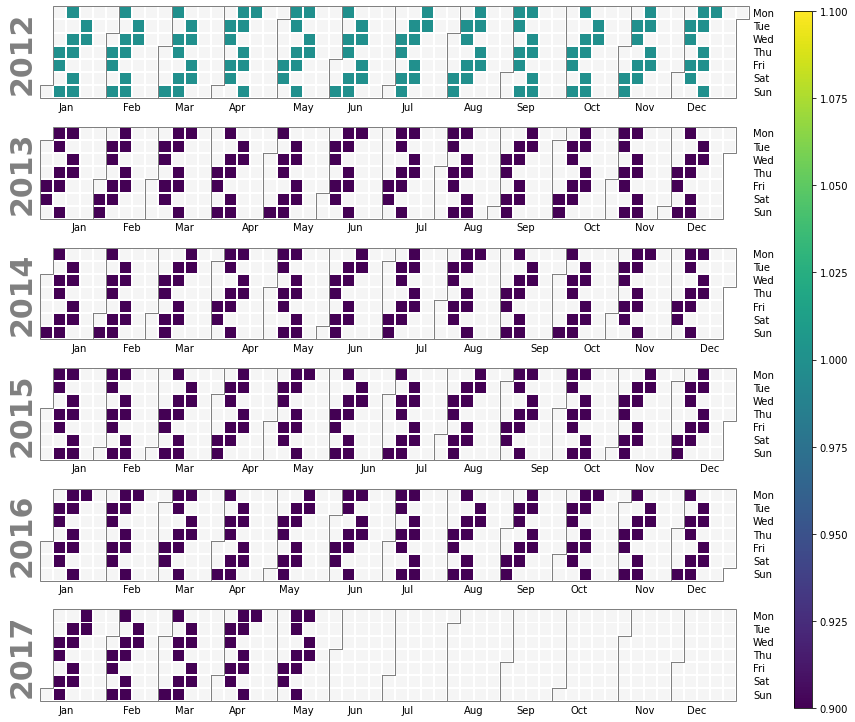

In [ ]:
#For Wisconsin
event=pd.Series(np.array(cal['snap_WI'].to_list()),index=day) # storing SNAP and non-SNAP day respectively 
calplot.calplot(event,vmin=1, vmax=1) # plotting calendar heatmap

Answer:In Wisconsin every (2,3,5,6,8,9,11,12,14,15)10 days of the month are reserved for SNAP but the pattern pops at random 4 day or three day or 2 day gap of each month with 31 days having gap of one or two day more than the 30 day month while the month of feb here is having the pattern after 1 day gap.

Q. How many event are under the different category of type of event in a year


In [ ]:
cal_12_13=cal[(cal['year']>=2012)&(cal['year']<2013)] # dataframe for year 1 year i.e. from 2012 to 2013
cal_12_13['event_type_1'].value_counts() #counting number  of each type of events in a year 

Religious    10
National     10
Cultural      7
Sporting      3
Name: event_type_1, dtype: int64

Answer : The Religious and National events are equal and higest in number while sporting events are only 3 which is minimum

Q. How many events occur in every month of an year.Which month have the most number of event and which month has least number of event.

In [ ]:
#loop to calculate event type count for every month
for i in range(1,13):
  cal_mon=cal_12_13[(cal_12_13['month']==i)]
  print("Month : ",i,"\nEvent Count\n",cal_mon['event_type_1'].value_counts())

Month :  1 
Event Count
 National     2
Religious    1
Sporting     0
Cultural     0
Name: event_type_1, dtype: int64
Month :  2 
Event Count
 Religious    2
Sporting     1
National     1
Cultural     1
Name: event_type_1, dtype: int64
Month :  3 
Event Count
 Religious    1
Cultural     1
Sporting     0
National     0
Name: event_type_1, dtype: int64
Month :  4 
Event Count
 Religious    2
Cultural     1
Sporting     0
National     0
Name: event_type_1, dtype: int64
Month :  5 
Event Count
 Cultural     2
National     1
Sporting     0
Religious    0
Name: event_type_1, dtype: int64
Month :  6 
Event Count
 Sporting     2
Cultural     1
Religious    0
National     0
Name: event_type_1, dtype: int64
Month :  7 
Event Count
 Religious    1
National     1
Sporting     0
Cultural     0
Name: event_type_1, dtype: int64
Month :  8 
Event Count
 Religious    1
Sporting     0
National     0
Cultural     0
Name: event_type_1, dtype: int64
Month :  9 
Event Count
 National     1
Sporting     0
R

Feb month have most event while August have only 1 event

### Bivariate Analysis : Price Dataframe

Qustion :How does product prices changes through the weeks in stores of each state

In [25]:
food=price[price['item_id']=='FOODS_3_823'][['store_id','wm_yr_wk','sell_price']].groupby(['store_id','wm_yr_wk']).mean()
fd=food.reset_index()

fd

,store_id,wm_yr_wk,sell_price
0,CA_1,11101,NaN
1,CA_1,11102,NaN
2,CA_1,11103,NaN
3,CA_1,11104,NaN
4,CA_1,11105,NaN
...,...,...,...
2815,WI_3,11617,2.980469
2816,WI_3,11618,2.980469
2817,WI_3,11619,2.980469
2818,WI_3,11620,2.980469


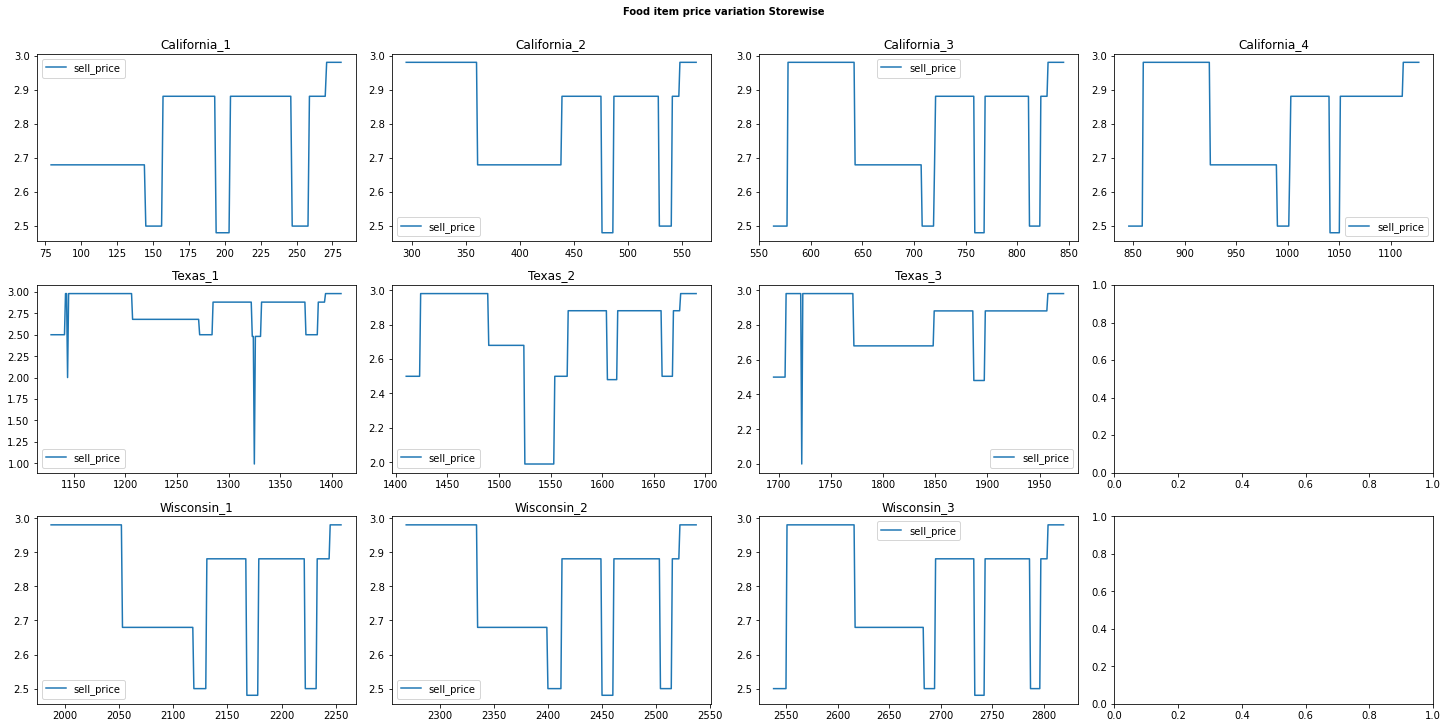

In [30]:
#Selecting 3 Random product from Each Category
food=price[price['item_id']=='FOODS_3_823'][['store_id','wm_yr_wk','sell_price']].groupby(['store_id','wm_yr_wk']).mean()
hobi=price[price['item_id']=='HOBBIES_1_002'][['store_id','wm_yr_wk','sell_price']].groupby(['store_id','wm_yr_wk']).mean()
hhld=price[price['item_id']=='HOUSEHOLD_1_004'][['store_id','wm_yr_wk','sell_price']].groupby(['store_id','wm_yr_wk']).mean()

food=food.reset_index()
hobi=hobi.reset_index()
hhld=hhld.reset_index()

#seggregating item price based on store id
ca_1=food[food['store_id']=='CA_1'][['sell_price']]
ca_2=food[food['store_id']=='CA_2'][['sell_price']]
ca_3=food[food['store_id']=='CA_3'][['sell_price']]
ca_4=food[food['store_id']=='CA_4'][['sell_price']]
tx_1=food[food['store_id']=='TX_1'][['sell_price']]
tx_2=food[food['store_id']=='TX_2'][['sell_price']]
tx_3=food[food['store_id']=='TX_3'][['sell_price']]
wi_1=food[food['store_id']=='WI_1'][['sell_price']]
wi_2=food[food['store_id']=='WI_2'][['sell_price']]
wi_3=food[food['store_id']=='WI_3'][['sell_price']]

figure, axes = plt.subplots(3, 4,constrained_layout=True)
plt.suptitle("Food item price variation Storewise",fontsize=10,fontweight ="bold")
ca_1.plot(ax=axes[0,0],figsize=(20,10),title="California_1")
ca_2.plot(ax=axes[0,1],figsize=(20,10),title="California_2")
ca_3.plot(ax=axes[0,2],figsize=(20,10),title="California_3")
ca_4.plot(ax=axes[0,3],figsize=(20,10),title="California_4")
tx_1.plot(ax=axes[1,0],figsize=(20,10),title="Texas_1")
tx_2.plot(ax=axes[1,1],figsize=(20,10),title="Texas_2")
tx_3.plot(ax=axes[1,2],figsize=(20,10),title="Texas_3")
wi_1.plot(ax=axes[2,0],figsize=(20,10),title="Wisconsin_1")
wi_2.plot(ax=axes[2,1],figsize=(20,10),title="Wisconsin_2")
wi_3.plot(ax=axes[2,2],figsize=(20,10),title="Wisconsin_3")


From these plots we can assume that the price of food items may change depending on the store so the price in food category is a local parameter.

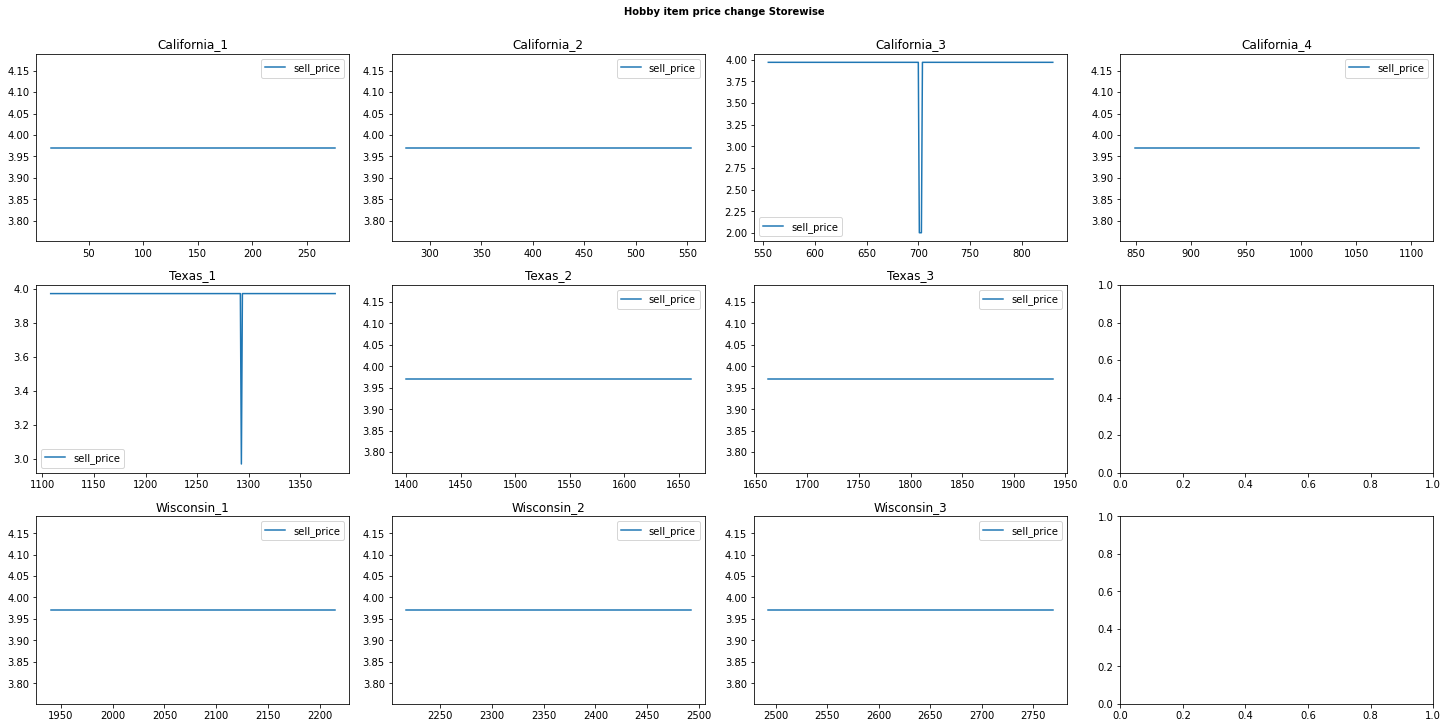

In [31]:
#seggregating item price based on store id
ca_1=hobi[hobi['store_id']=='CA_1'][['sell_price']]
ca_2=hobi[hobi['store_id']=='CA_2'][['sell_price']]
ca_3=hobi[hobi['store_id']=='CA_3'][['sell_price']]
ca_4=hobi[hobi['store_id']=='CA_4'][['sell_price']]
tx_1=hobi[hobi['store_id']=='TX_1'][['sell_price']]
tx_2=hobi[hobi['store_id']=='TX_2'][['sell_price']]
tx_3=hobi[hobi['store_id']=='TX_3'][['sell_price']]
wi_1=hobi[hobi['store_id']=='WI_1'][['sell_price']]
wi_2=hobi[hobi['store_id']=='WI_2'][['sell_price']]
wi_3=hobi[hobi['store_id']=='WI_3'][['sell_price']]

figure, axes = plt.subplots(3, 4,constrained_layout=True)
plt.suptitle("Hobby item price change Storewise",fontsize=10,fontweight ="bold")
ca_1.plot(ax=axes[0,0],figsize=(20,10),title="California_1")
ca_2.plot(ax=axes[0,1],figsize=(20,10),title="California_2")
ca_3.plot(ax=axes[0,2],figsize=(20,10),title="California_3")
ca_4.plot(ax=axes[0,3],figsize=(20,10),title="California_4")
tx_1.plot(ax=axes[1,0],figsize=(20,10),title="Texas_1")
tx_2.plot(ax=axes[1,1],figsize=(20,10),title="Texas_2")
tx_3.plot(ax=axes[1,2],figsize=(20,10),title="Texas_3")
wi_1.plot(ax=axes[2,0],figsize=(20,10),title="Wisconsin_1")
wi_2.plot(ax=axes[2,1],figsize=(20,10),title="Wisconsin_2")
wi_3.plot(ax=axes[2,2],figsize=(20,10),title="Wisconsin_3")

For hobbies item it is safe to assume that prices vary aaccording to states and usually dont vary to much or at all

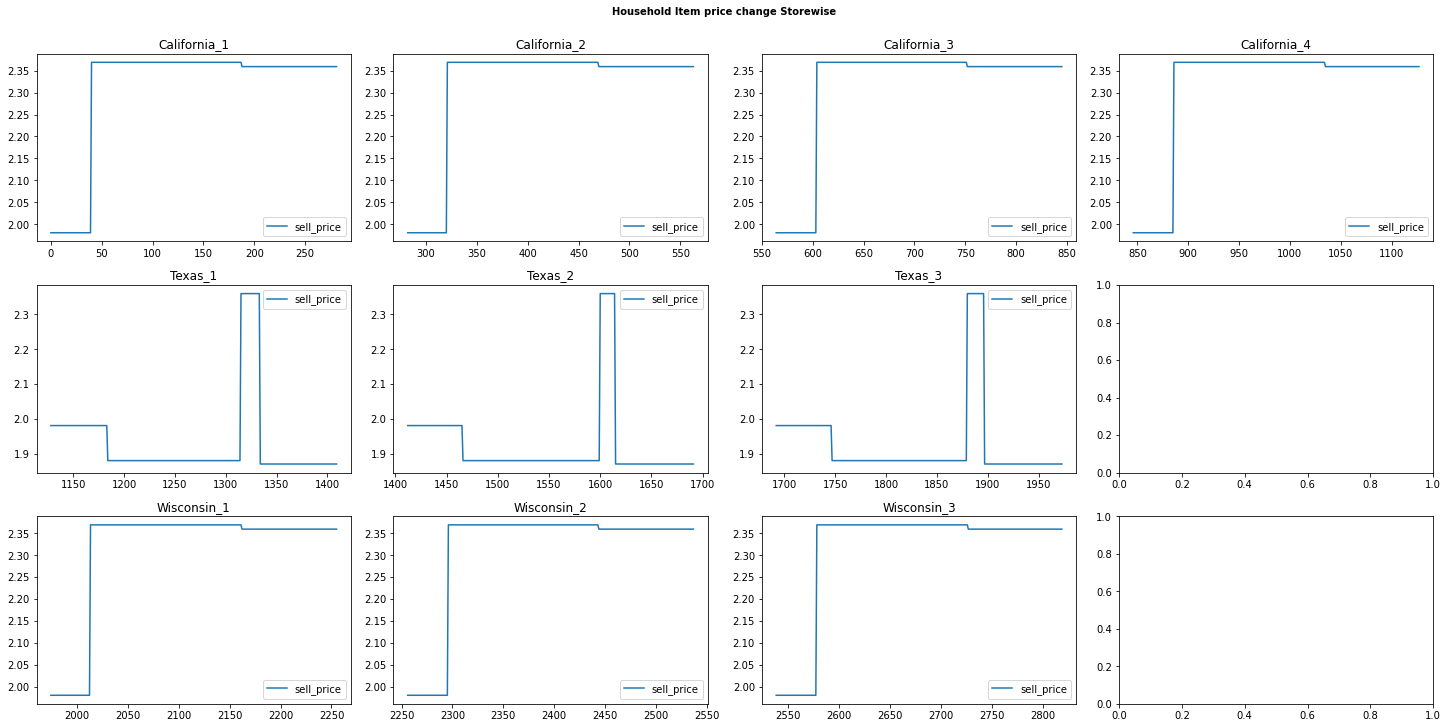

In [32]:
#seggregating item price based on store id
ca_1=hhld[hhld['store_id']=='CA_1'][['sell_price']]
ca_2=hhld[hhld['store_id']=='CA_2'][['sell_price']]
ca_3=hhld[hhld['store_id']=='CA_3'][['sell_price']]
ca_4=hhld[hhld['store_id']=='CA_4'][['sell_price']]
tx_1=hhld[hhld['store_id']=='TX_1'][['sell_price']]
tx_2=hhld[hhld['store_id']=='TX_2'][['sell_price']]
tx_3=hhld[hhld['store_id']=='TX_3'][['sell_price']]
wi_1=hhld[hhld['store_id']=='WI_1'][['sell_price']]
wi_2=hhld[hhld['store_id']=='WI_2'][['sell_price']]
wi_3=hhld[hhld['store_id']=='WI_3'][['sell_price']]

figure, axes = plt.subplots(3, 4,constrained_layout=True)
plt.suptitle("Household Item price change Storewise",fontsize=10,fontweight ="bold")
ca_1.plot(ax=axes[0,0],figsize=(20,10),title="California_1")
ca_2.plot(ax=axes[0,1],figsize=(20,10),title="California_2")
ca_3.plot(ax=axes[0,2],figsize=(20,10),title="California_3")
ca_4.plot(ax=axes[0,3],figsize=(20,10),title="California_4")
tx_1.plot(ax=axes[1,0],figsize=(20,10),title="Texas_1")
tx_2.plot(ax=axes[1,1],figsize=(20,10),title="Texas_2")
tx_3.plot(ax=axes[1,2],figsize=(20,10),title="Texas_3")
wi_1.plot(ax=axes[2,0],figsize=(20,10),title="Wisconsin_1")
wi_2.plot(ax=axes[2,1],figsize=(20,10),title="Wisconsin_2")
wi_3.plot(ax=axes[2,2],figsize=(20,10),title="Wisconsin_3")

Household item are also statewise varying and not storewise

### Bivariate Analysis:Sale_val Dataframe

Question: Which department sales highest and which sells minimum number of items

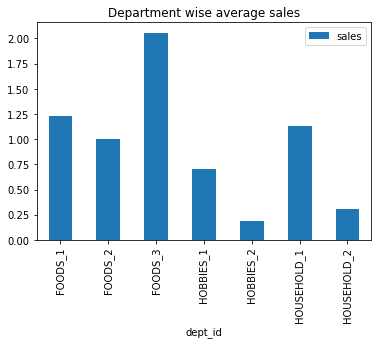

In [ ]:
dept_sales=sale_val[['dept_id','sales']] # separating department id and their repective sales in a dataframe
dept_sale=dept_sales.groupby(['dept_id']).mean() #grouping the sales according to their repective sales and calculate their mean
dept_sale.plot(kind='bar',title='Department wise average sales') #plotting data
plt.show()

Answer:Department Food_3 in food category sales highest overall and in its category 

In hobby category department HOBBIES_1 sales is greater and in HOUSEHOLD category HOUSEHOLD_1 sells more on an average.

This graph indirectly confirms that food category is highest sold and hobbies is least sold.

Question: Which store sells more item and which sells the least number of item

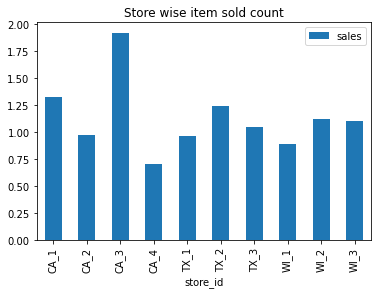

In [ ]:
store_sales=sale_val[['store_id','sales']]
store_sale=store_sales.groupby(['store_id']).mean()
store_sale.plot(kind='bar',title='Store wise item sold count')
plt.show()

Answer :
Max Average sales: CA_3

Min Average Sales : CA_4

Question : How is the share of each state in overall sales

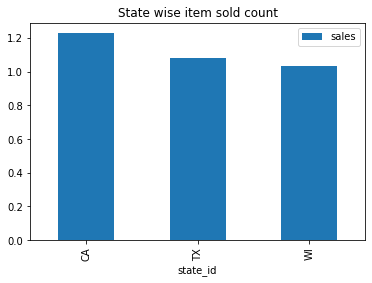

In [ ]:
state_sales=sale_val[['state_id','sales']]
state_sale=state_sales.groupby(['state_id']).mean()
state_sale.plot(kind='bar',title='State wise item sold count')
plt.show()

Answer: Highest selling state is california and lowest selling state is wisconsin

### Bivariate Analysis:Df Dataframe

Q.Does the daily sales have any cyclical pattern .Is it increasing through the years.Does it contain any zero values

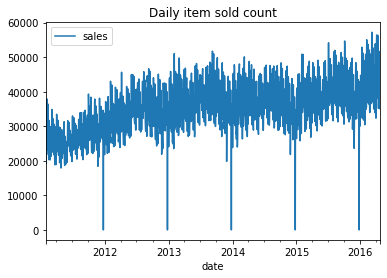

In [ ]:
#sale vs date
datewise_sales=df[['date','sales']]
day_sale=datewise_sales.groupby(['date']).sum()

day_sale.plot(title='Daily item sold count')
plt.show()

Answer : The daily sales shows a erratic cyclical pattern with increase in sales after every year.Also the sales in each year has one zero value on the date of 25 december(Christmas) .This may be due to the fact that all stores are closed on that day.

Q. How does the average sales looks like on each day of month .Which day has the most and least sale.

In [ ]:
df_12_15=df[(df['year']>=2012)&(df['year']<=2015)] #selecting data of the years with all the days of the year
df_12_15["day"] = df_12_15['date'].map(lambda x: x.day)#extracting day of month in to a separate column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


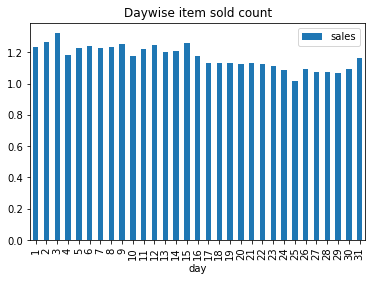

In [ ]:
daywise_sales=df_12_15[['day','sales']]
day_sale=daywise_sales.groupby(['day']).mean()
day_sale.plot(kind='bar',title='Daywise item sold count')
plt.show()

Answer: First three days of month report most sale on an average .
We can also observe the sales average remains relatively high than the last 15 days .This may be due to the fact that on first 15 days snap is kept.

Q. How does the average sales looks like on each day of week .Which day has the most and least sale.

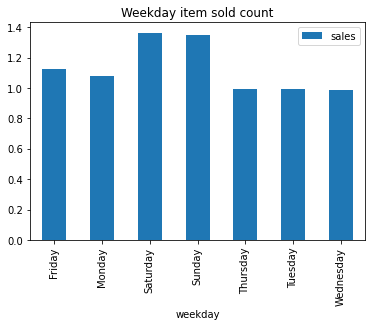

In [ ]:
#sales vs weekday
weekwise_sales=df[['weekday','sales']]
week_sale=weekwise_sales.groupby(['weekday']).mean()
week_sale.plot(kind='bar',title='Weekday item sold count')
plt.show()

Answer: The average sale each day is between 1 to 1.4.

Saturday and Sunday have the highest sales while Tuesday,Wednesday,Thursday reports lowest sale.

In conclusion people shop more on weekends than on weekdays.

Q. How does the average sales looks like on each month of year .Which month has the most and least sale.

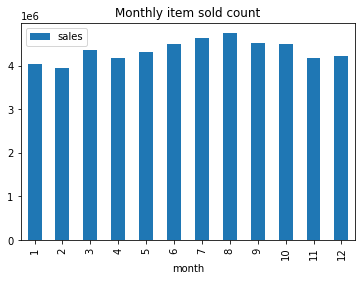

In [ ]:
#sales vs  month
monthwise_sales=df_12_15[['month','sales']]
month_sale=monthwise_sales.groupby(['month']).sum()
month_sale.plot(kind='bar',title='Monthly item sold count')
plt.show()

Answer:The sale pattern is cyclical with increase in sales from 4th to 8th month and than a decrease in sales from 9th to 2nd month and then a rise in 3rd month.

Highest sales is in the month of August and lowest in February(due to only 28 days in a month) 

Q.How does the sales numbered varied over the year.Which year reported most sales and which least?

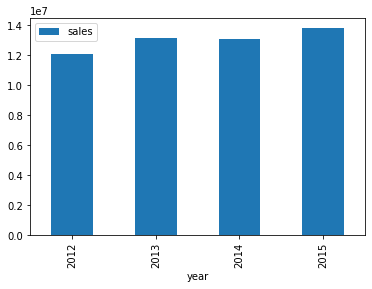

In [ ]:
#sales vs year
year_sale=df_12_15[['year','sales']].groupby(['year']).sum()
year_sale.plot(kind='bar')

Answer : The sales over the years has increased but with very little increments.The higest sale was recorded in year 2015 and lowest in 2012.We did not used data from 2011 and 2016 as the data was not of whole year

Q. Analyze sales figures on event days

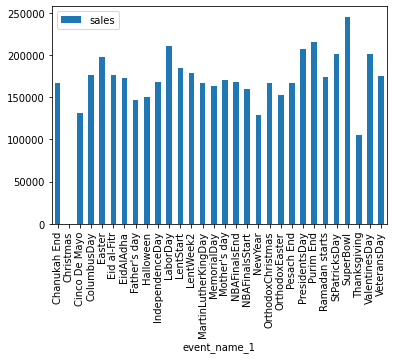

In [ ]:
#sales vs event name 1
event_name_sale=df[['event_name_1','sales']].groupby(['event_name_1']).sum()
event_name_sale.plot(kind='bar')

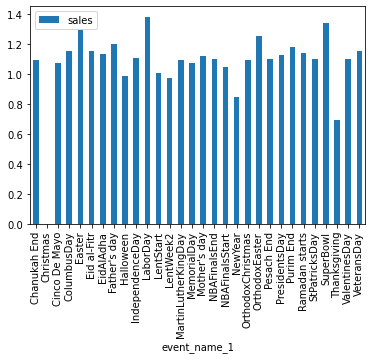

In [ ]:
ens=df[['event_name_1','sales']].groupby(['event_name_1']).mean()
ens.plot(kind='bar')

Answer:
1. Highest selling event by qty : SuperBowl
2. Highest selling event by avg : Labor day and easter
3. Christmas their is no sale due to closed store
4. Least selling event by qty and avg : Thanksgiving as people prefers staying at home 

Q. Which type of event have most and least sales

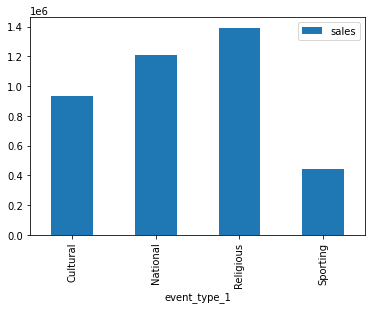

In [ ]:
#sales vs event type 1
event_type_sale=df_12_15[['event_type_1','sales']].groupby(['event_type_1']).sum()
event_type_sale.plot(kind='bar')

Answer : Religious event gives most sales while sporting event gives least but this due to the fact that the religious events are more incomparison to sporting and other events.

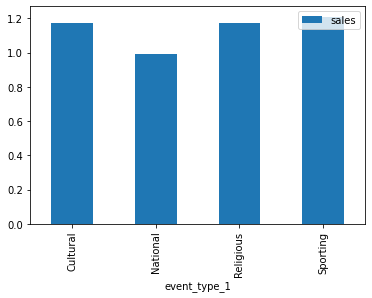

In [ ]:
event_type_sale=df_12_15[['event_type_1','sales']].groupby(['event_type_1']).mean()
event_type_sale.plot(kind='bar')

This shows the actual scenario of the event where on the day of the event most sales are recorded in sporting as people go out on these holidays and buy food items for the events.

Question : Does the snap encourages more sale in the state than non snap day.

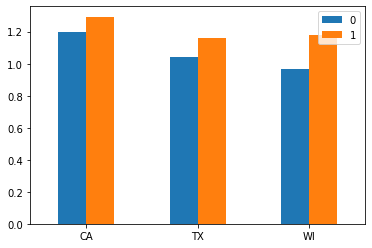

In [ ]:
#sales vs snap non snap d
snap_ca_sales=df[df['state_id']=='CA'][['snap_CA','sales']]
snap_tx_sales=df[df['state_id']=='TX'][['snap_TX','sales']]
snap_wi_sales=df[df['state_id']=='WI'][['snap_WI','sales']]

snap_ca_sale=snap_ca_sales.groupby(['snap_CA']).mean()
snap_tx_sale=snap_tx_sales.groupby(['snap_TX']).mean()
snap_wi_sale=snap_wi_sales.groupby(['snap_WI']).mean()

scs=snap_ca_sale['sales'].to_list()
sts=snap_tx_sale['sales'].to_list()
sws=snap_wi_sale['sales'].to_list()


index=df['state_id'].unique()
snap_day=[scs[1],sts[1],sws[1]]
non_snap_day=[scs[0],sts[0],sws[0]]

sss_df=pd.DataFrame({'0':non_snap_day,
                     '1':snap_day},index=index)

ax = sss_df.plot.bar(rot=0)

Answer : The graph above shows more sales on snap days on an average than the normal days

## Trivariate Analysis of Dataframes

### Trivariate Analysis: Df Dataframe

Q. How is the sales of category affected through the week?

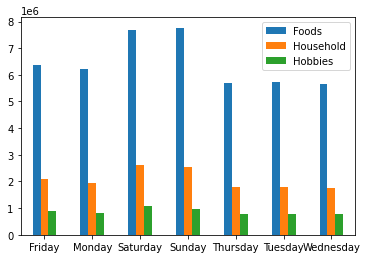

In [ ]:
week_cat_sales=df[['weekday','cat_id','sales']]
week_cat_sale=week_cat_sales.groupby(['weekday','cat_id']).sum()

wcs=week_cat_sale.reset_index()

index=wcs['weekday'].unique()
foods=wcs[wcs['cat_id']=='FOODS']['sales'].to_list()
household=wcs[wcs['cat_id']=='HOUSEHOLD']['sales'].to_list()
hobbies=wcs[wcs['cat_id']=='HOBBIES']['sales'].to_list()

wcs_df = pd.DataFrame({'Foods': foods,
                   'Household': household,
                   'Hobbies': hobbies}, index=index)
ax = wcs_df.plot.bar(rot=0)

Answer : The weekly pattern shows no proportionate difference than that of the combined sales of all the category. 

Although the share of the food category is much higher than both the category.

The relative increase in sales is also reflective in the days of higher sales i.e. saturday and sunday.

While we can see that tuesday,wednesday,thursday are having same sales and also the lowest in all three categories.


Q. How is the sales of category affected through the month?

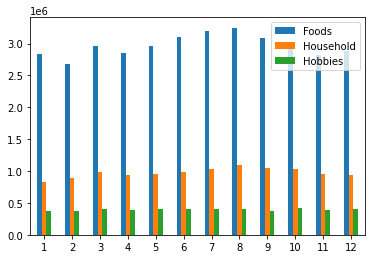

In [ ]:
mon_cat_sales=df_12_15[['month','cat_id','sales']]
mon_cat_sale=mon_cat_sales.groupby(['month','cat_id']).sum()

mcs=mon_cat_sale.reset_index()

index=mcs['month'].unique()
foods=mcs[mcs['cat_id']=='FOODS']['sales'].to_list()
household=mcs[mcs['cat_id']=='HOUSEHOLD']['sales'].to_list()
hobbies=mcs[mcs['cat_id']=='HOBBIES']['sales'].to_list()

mcs_df = pd.DataFrame({'Foods': foods,
                   'Household': household,
                   'Hobbies': hobbies}, index=index)
ax = mcs_df.plot.bar(rot=0)

Answer : The overall look in the graph gives a pattern of seasonality showing a wave like pattern with proportionate change in the sales of category.

But here one thing is noticeable which suggest hobbies category sells almost evenly throughout the year with little to no deviation.

Although the hobbies and food have some proportionate seasonal change which suugest that the months from April to August sees increase in sales month on month.

After august the sales continuously decrease till nest years february.Seeing a abrubpt increase in march.

Here one thing can be concluded from this month that the sales figures greatly depends in the characterstics of the month like number of festival and kind of festivals in that month and also on number oif days in that month.Since august
is the month of only one event therefore it has highest sales which suggest occurence of some event negatively affects the sales.Which is an contradictory observation.

Also the month of february has the lowest sales is only due to the fact that it has only 28 to 29 days .  

Q. In a month how does the sales of category is affected by the day of the month?

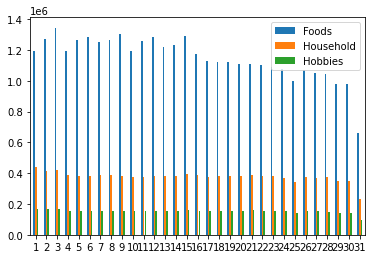

In [ ]:
day_cat_sales=df_12_15[['day','cat_id','sales']]
day_cat_sale=day_cat_sales.groupby(['day','cat_id']).sum()

dcs=day_cat_sale.reset_index()

index=dcs['day'].unique()
foods=dcs[dcs['cat_id']=='FOODS']['sales'].to_list()
household=dcs[dcs['cat_id']=='HOUSEHOLD']['sales'].to_list()
hobbies=dcs[dcs['cat_id']=='HOBBIES']['sales'].to_list()

dcs_df = pd.DataFrame({'Foods': foods,
                   'Household': household,
                   'Hobbies': hobbies}, index=index)
ax = dcs_df.plot.bar(rot=0)

Answer: The higest sales is recorded on the third day of month with major contribution of food category while lowest being on the thirty first day.

This is due to the fact that in all states the third day is a snap day.Also its the starting of month where in people stock up thier grocery supplies.

Lowest sales on 31 is due to the fact that it ocuurs in only 5 months and also due to the fact that it is the end of the month when people are out of all their earnings.

Till the day of fifteenth it is observed that there is waves of high sales even the lows before this date is very high than usual, is due to the contribution of food category which is affected by the occurence of snap day between these days .So if their is a increase in sales is recorded than its probably due to SNAP.

As evident from the fact that the sales of household and hobbies item is mostly undeviating.


Q. What are the effects on sales figures due to the different event type?

In [ ]:
import math
etlist=df['event_type_1'].to_list()
for i in range(len(etlist)):
  if type(etlist[i])!=str:
    if math.isnan(etlist[i]):
      etlist[i]="Noevent"
df['et']=etlist  

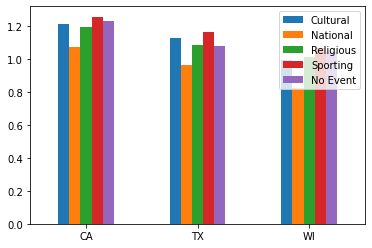

In [ ]:
et_ca_sales=df[df['state_id']=='CA'][['et','sales']]
et_tx_sales=df[df['state_id']=='TX'][['et','sales']]
et_wi_sales=df[df['state_id']=='WI'][['et','sales']]

et_ca_sale=et_ca_sales.groupby(['et']).mean()
et_tx_sale=et_tx_sales.groupby(['et']).mean()
et_wi_sale=et_wi_sales.groupby(['et']).mean()

etcs=et_ca_sale['sales'].to_list()
etts=et_tx_sale['sales'].to_list()
etws=et_wi_sale['sales'].to_list()


index=df['state_id'].unique()
c_day=[etcs[0],etts[0],etws[0]]
n_day=[etcs[1],etts[1],etws[1]]
r_day=[etcs[3],etts[3],etws[3]]
s_day=[etcs[4],etts[4],etws[4]]
ne_day=[etcs[2],etts[2],etws[2]]
etss_df=pd.DataFrame({'Cultural':c_day,
                     'National':n_day,
                     'Religious':r_day,
                     'Sporting':s_day,
                      'No Event':ne_day},index=index)

ax = etss_df.plot.bar(rot=0)

Answer :While comparing events with non event daays it shows very interesting insights.

On sporting days in all three states the sales is more than any event.Which can be due to the fact that people coming out of for the event tend to buy food items on the day itself for them to eat at the event venue.

Cultural events also shows similar high sales on the daay of event is  probably due to the same reason as in sporting event.

While if we see a religious event the sales are almost same as the non event days in all three states which can be because people are celebrating the event of that particular sect at home while other sect maintains the sales figures unchanged than normal days.

National events have the least sales of all four types and even less than the normal days.This can be due to people being staying at home to have their holiday with no propective reason to spend extra.

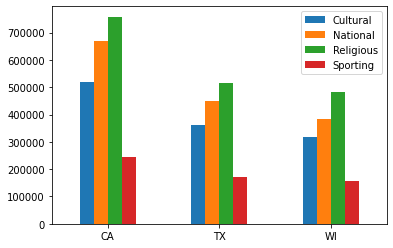

In [ ]:
et_ca_sale=et_ca_sales.groupby(['et']).sum()
et_tx_sale=et_tx_sales.groupby(['et']).sum()
et_wi_sale=et_wi_sales.groupby(['et']).sum()

etcs=et_ca_sale['sales'].to_list()
etts=et_tx_sale['sales'].to_list()
etws=et_wi_sale['sales'].to_list()


index=df['state_id'].unique()
c_day=[etcs[0],etts[0],etws[0]]
n_day=[etcs[1],etts[1],etws[1]]
r_day=[etcs[3],etts[3],etws[3]]
s_day=[etcs[4],etts[4],etws[4]]
etss_df=pd.DataFrame({'Cultural':c_day,
                     'National':n_day,
                     'Religious':r_day,
                     'Sporting':s_day},index=index)

ax = etss_df.plot.bar(rot=0)

If we take into account only the quantity of item sold in each type of event.WE see most sale for religious event as they are maximum in numbers and same goes with national.

While sporting event are only 3 hence not much sales can accumulate in only three days of event throughout the  year.Same is true with the cultural events as they are only 7

Q. How does the sales affected when the snap day is there in california,texas and wisconsin?

In [ ]:
df_snap_ca=df[(df['date']>='2015-02-01')&(df['date']<='2015-02-28')&(df['state_id']=='CA')]
df_ca=df_snap_ca[['date','sales']]
day_sale=df_ca.groupby(['date']).sum()
df_snap=cal[(cal['date']>='2015-02-01')&(cal['date']<='2015-02-28')][['date','snap_CA']]
m=day_sale['sales'].max()
df_snap['snap_CA']=df_snap['snap_CA']*m
df_snap.set_index("date", inplace = True)

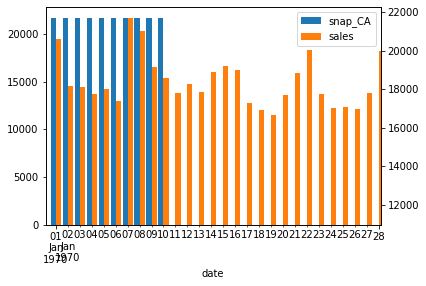

In [ ]:
width=0.85
df_snap['sales']=day_sale['sales']
df_snap.plot(kind='bar',width = width)
df_snap['sales'].plot(kind='line',secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(df_snap['sales'])-width])
plt.show()

Answer: In california the sales does not seem to be affected by snap.The pattern is more inclined towards the day of the week since the salaries are paid of weekly so it is observed that evey day in multiple of seven observe rise and sale and then decrease in the following days.

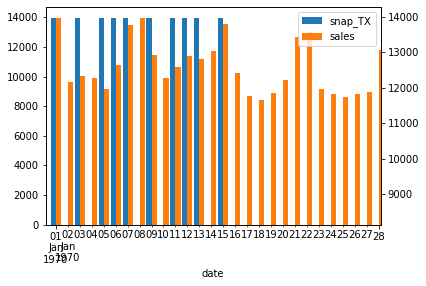

In [ ]:
df_snap_ca=df[(df['date']>='2015-02-01')&(df['date']<='2015-02-28')&(df['state_id']=='TX')]
df_ca=df_snap_ca[['date','sales']]
day_sale=df_ca.groupby(['date']).sum()
df_snap=cal[(cal['date']>='2015-02-01')&(cal['date']<='2015-02-28')][['date','snap_TX']]
m=day_sale['sales'].max()
df_snap['snap_TX']=df_snap['snap_TX']*m
df_snap.set_index("date", inplace = True)

import matplotlib.pyplot as plt
width=0.85
df_snap['sales']=day_sale['sales']
df_snap.plot(kind='bar',width = width)
df_snap['sales'].plot(kind='line',secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(df_snap['sales'])-width])
plt.show()

Answer: Here the impact of Snap is significant on the sales as the sales figure increase when the snap event occur.also the days with multiple of 7 is also impacting sales a lot

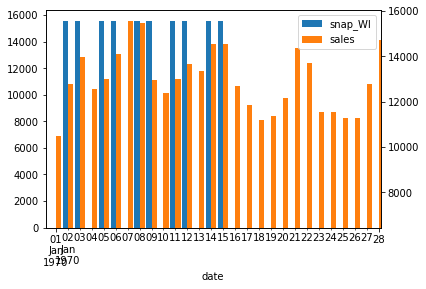

In [ ]:
df_snap_ca=df[(df['date']>='2015-02-01')&(df['date']<='2015-02-28')&(df['state_id']=='WI')]
df_ca=df_snap_ca[['date','sales']]
day_sale=df_ca.groupby(['date']).sum()
df_snap=cal[(cal['date']>='2015-02-01')&(cal['date']<='2015-02-28')][['date','snap_WI']]
m=day_sale['sales'].max()
df_snap['snap_WI']=df_snap['snap_WI']*m
df_snap.set_index("date", inplace = True)

import matplotlib.pyplot as plt
width=0.85
df_snap['sales']=day_sale['sales']
df_snap.plot(kind='bar',width = width)
df_snap['sales'].plot(kind='line',secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(df_snap['sales'])-width])
plt.show()

Answer:In wisconsin the sales are affected by snap days  with influence of multiples of 7 also prevailing simiarly as in other two states.

Q. What is tha wave pattern for sales in different states?What is the trend of sales through the years.Is thier any sesonality in the pattern?

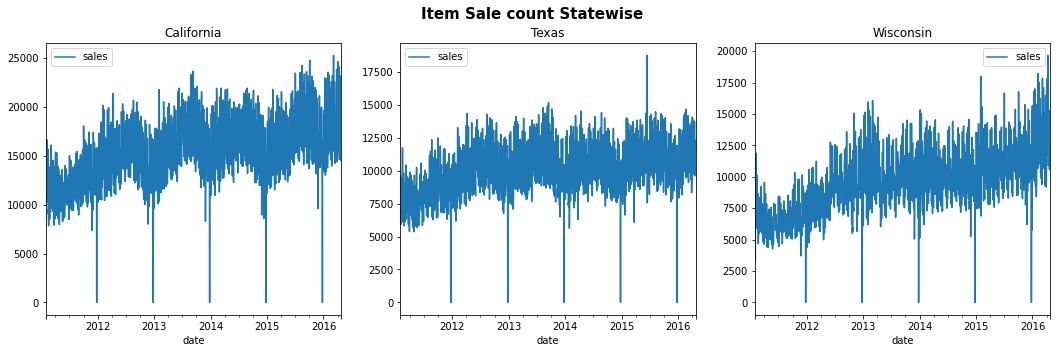

In [ ]:
df_total_sale_state=df[['state_id','date','sales']]
df_ca=df_total_sale_state[df_total_sale_state['state_id']=='CA']
df_tx=df_total_sale_state[df_total_sale_state['state_id']=='TX']
df_wi=df_total_sale_state[df_total_sale_state['state_id']=='WI']

ca=df_ca[['date','sales']]
tx=df_tx[['date','sales']]
wi=df_wi[['date','sales']]

ca=ca.groupby(['date']).sum()
tx=tx.groupby(['date']).sum()
wi=wi.groupby(['date']).sum()

figure, axes = plt.subplots(1, 3)
plt.suptitle("Item Sale count Statewise",fontsize=15,fontweight ="bold")
ca.plot(ax=axes[0],figsize=(18,5),title="California")
tx.plot(ax=axes[1],figsize=(18,5),title="Texas")
wi.plot(ax=axes[2],figsize=(18,5),title="Wisconsin")

In california the sale has touched a maximum of close to 25000, in texas its 17500 , and close to 20000 in wisconsin in a day

California shows a periodic trend along the year with a seasonal increase and decrease,and their is a slight uptrend in california with passing year

Sales in texas have constant trend with no slope and a rather constant bandwidth with distorted seasonality.

Sales in wisconsin have a general uptrend with very evenly spread sales count in localized region.In wisconsin the seasonality is not that clear the sprad is quiet uniform with a seasonal pattern but with very minor crest and troughs


Unit sales of all products, aggregated for each store

In [ ]:
df_total_sale_state=df[['state_id','date','sales','store_id']]
df_ca=df_total_sale_state[df_total_sale_state['state_id']=='CA']
df_tx=df_total_sale_state[df_total_sale_state['state_id']=='TX']
df_wi=df_total_sale_state[df_total_sale_state['state_id']=='WI']

ca=df_ca[['date','sales','store_id']]
tx=df_tx[['date','sales','store_id']]
wi=df_wi[['date','sales','store_id']]

ca1=ca[ca['store_id']=='CA_1'].groupby(['date']).sum()
ca2=ca[ca['store_id']=='CA_2'].groupby(['date']).sum()
ca3=ca[ca['store_id']=='CA_3'].groupby(['date']).sum()
ca4=ca[ca['store_id']=='CA_4'].groupby(['date']).sum()

tx1=tx[tx['store_id']=='TX_1'].groupby(['date']).sum()
tx2=tx[tx['store_id']=='TX_2'].groupby(['date']).sum()
tx3=tx[tx['store_id']=='TX_3'].groupby(['date']).sum()

wi1=wi[wi['store_id']=='WI_1'].groupby(['date']).sum()
wi2=wi[wi['store_id']=='WI_2'].groupby(['date']).sum()
wi3=wi[wi['store_id']=='WI_3'].groupby(['date']).sum()

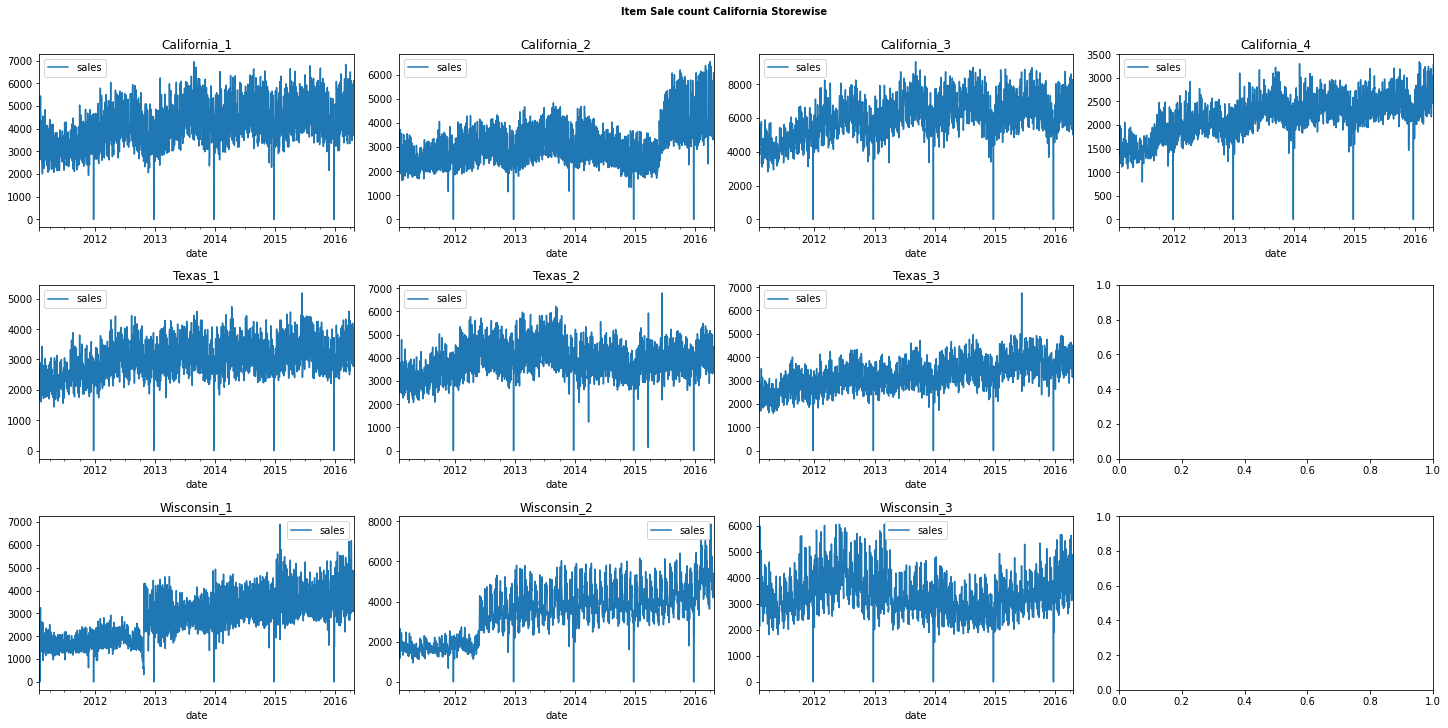

In [ ]:
figure, axes = plt.subplots(3, 4,constrained_layout=True)
plt.suptitle("Item Sale count California Storewise",fontsize=10,fontweight ="bold")
ca1.plot(ax=axes[0,0],figsize=(20,10),title="California_1")
ca2.plot(ax=axes[0,1],figsize=(20,10),title="California_2")
ca3.plot(ax=axes[0,2],figsize=(20,10),title="California_3")
ca4.plot(ax=axes[0,3],figsize=(20,10),title="California_4")
tx1.plot(ax=axes[1,0],figsize=(20,10),title="Texas_1")
tx2.plot(ax=axes[1,1],figsize=(20,10),title="Texas_2")
tx3.plot(ax=axes[1,2],figsize=(20,10),title="Texas_3")
wi1.plot(ax=axes[2,0],figsize=(20,10),title="Wisconsin_1")
wi2.plot(ax=axes[2,1],figsize=(20,10),title="Wisconsin_2")
wi3.plot(ax=axes[2,2],figsize=(20,10),title="Wisconsin_3")

In California in the years between 2012 to 2014 all stores a seasonal behaviour while changes are notuceable in sales pattern after 2014 in store 2.Store 3 have shown max sales with 1,2,4 following it.

In Texas mostly their a constant seasonal sales with very constant sales throughout the years.While their are some outliers in store 2 other than that most sales is a constant sine wave

In Wisconsin the trends are not seasonal.But the sales has increased year on year in store 1,2 so there is a up trend .In store three thier is a big uptrend(b/w 2011 to 2013) and downtrend(b/w 2013 to 2015) and then a uptrend with no seasonality. 



Unit sales of all products, aggregated for each category

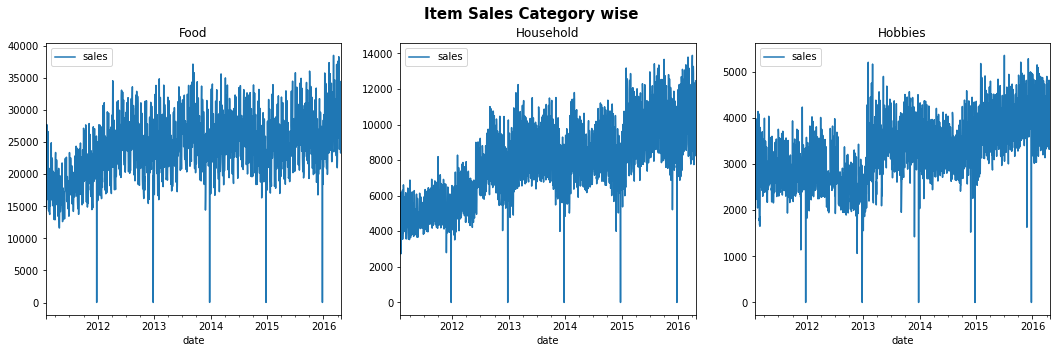

In [ ]:
df1=df[['cat_id','date','sales']]
df_fo=df1[df1['cat_id']=='FOODS'].groupby(['date']).sum()
df_hh=df1[df1['cat_id']=='HOUSEHOLD'].groupby(['date']).sum()
df_hb=df1[df1['cat_id']=='HOBBIES'].groupby(['date']).sum()

figure, axes = plt.subplots(1, 3)
plt.suptitle("Item Sales Category wise",fontsize=15,fontweight ="bold")
df_fo.plot(ax=axes[0],figsize=(18,5),title="Food")
df_hh.plot(ax=axes[1],figsize=(18,5),title="Household")
df_hb.plot(ax=axes[2],figsize=(18,5),title="Hobbies")

In food category the waveform is constant with flat trend with slight slope at the end of 2015 and starting of 2016
In household category their is a visble uptrend with erractic sales pattern

In hobbies category the data has no trend or repetitive waveform as hobbie item are needed very less frequently

In conclusion the wave patterns suggest that the seasonality visble in any of the other graph where category wise separation is not there is only due to the large influence of food category and this repetition is not caused by the sales of household and hobbies item

One thing can also be deduced that sales are constant and seasonal due to food category bu the uptrend or downtrend is caused majorly by other two categories. 

In [ ]:
df_total_sale_state=df[['cat_id','state_id','date','sales']]
df_ca=df_total_sale_state[df_total_sale_state['state_id']=='CA']
df_tx=df_total_sale_state[df_total_sale_state['state_id']=='TX']
df_wi=df_total_sale_state[df_total_sale_state['state_id']=='WI']

df_ca_fo=df_ca[df_ca['cat_id']=='FOODS']
df_ca_hh=df_ca[df_ca['cat_id']=='HOUSEHOLD']
df_ca_hb=df_ca[df_ca['cat_id']=='HOBBIES']

df_tx_fo=df_tx[df_tx['cat_id']=='FOODS']
df_tx_hh=df_tx[df_tx['cat_id']=='HOUSEHOLD']
df_tx_hb=df_tx[df_tx['cat_id']=='HOBBIES']

df_wi_fo=df_wi[df_wi['cat_id']=='FOODS']
df_wi_hh=df_wi[df_wi['cat_id']=='HOUSEHOLD']
df_wi_hb=df_wi[df_wi['cat_id']=='HOBBIES']


ca_fo=df_ca_fo[['date','sales']].groupby(['date']).sum()
tx_fo=df_tx_fo[['date','sales']].groupby(['date']).sum()
wi_fo=df_wi_fo[['date','sales']].groupby(['date']).sum()

ca_hh=df_ca_hh[['date','sales']].groupby(['date']).sum()
tx_hh=df_tx_hh[['date','sales']].groupby(['date']).sum()
wi_hh=df_wi_hh[['date','sales']].groupby(['date']).sum()

ca_hb=df_ca_hb[['date','sales']].groupby(['date']).sum()
tx_hb=df_tx_hb[['date','sales']].groupby(['date']).sum()
wi_hb=df_wi_hb[['date','sales']].groupby(['date']).sum()

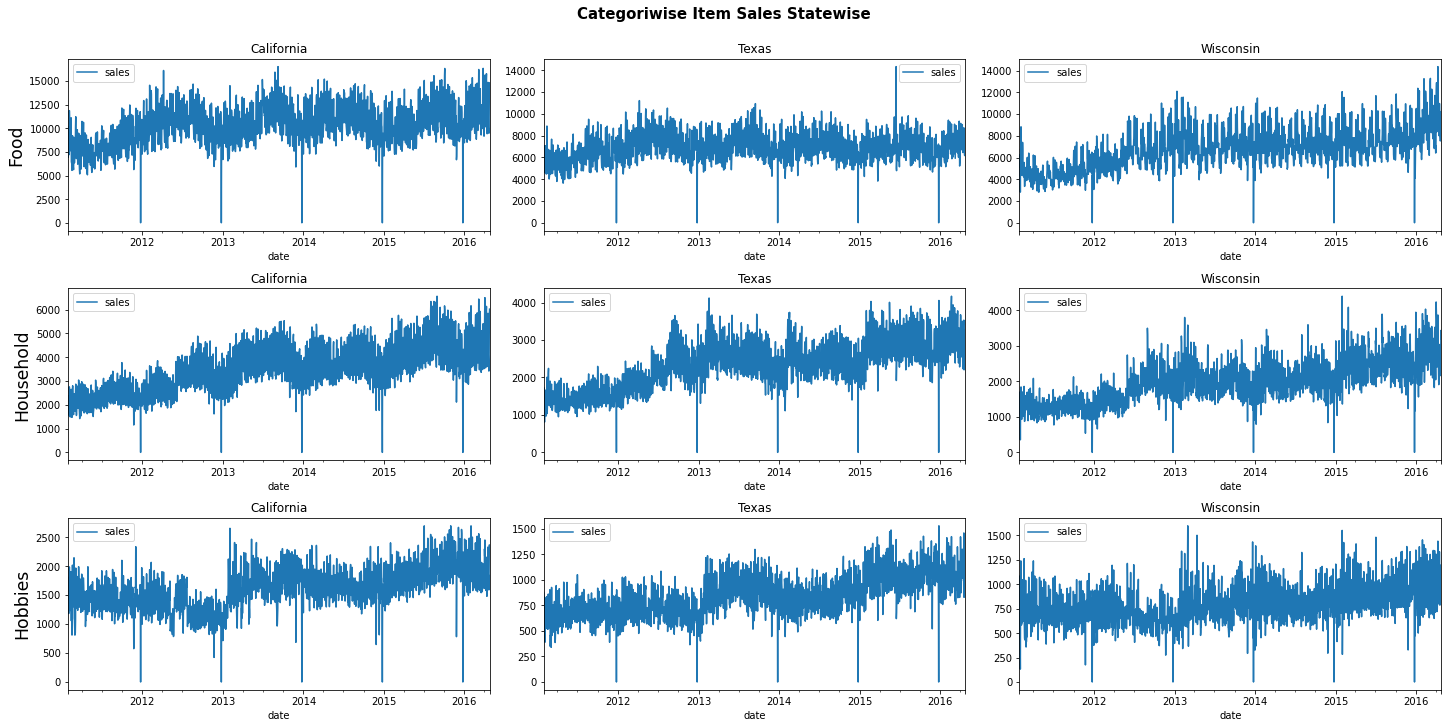

In [ ]:
figure, axes = plt.subplots(3, 3,constrained_layout=True)
plt.suptitle("Categoriwise Item Sales Statewise",fontsize=15,fontweight ="bold")
ca_fo.plot(ax=axes[0,0],figsize=(20,10),title="California")
tx_fo.plot(ax=axes[0,1],figsize=(20,10),title="Texas")
wi_fo.plot(ax=axes[0,2],figsize=(20,10),title="Wisconsin")
ca_hh.plot(ax=axes[1,0],figsize=(20,10),title="California")
tx_hh.plot(ax=axes[1,1],figsize=(20,10),title="Texas")
wi_hh.plot(ax=axes[1,2],figsize=(20,10),title="Wisconsin")
ca_hb.plot(ax=axes[2,0],figsize=(20,10),title="California")
tx_hb.plot(ax=axes[2,1],figsize=(20,10),title="Texas")
wi_hb.plot(ax=axes[2,2],figsize=(20,10),title="Wisconsin")

rows = [row for row in ['Food', 'Household','Hobbies']]
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation= 'vertical', size='xx-large')

Even in the statewise sepaeration of category wise sales is seasonal and repetitive when it comes to food items

While Household is mainly contributing to the uptrend across all three states with little variation in the slopes.

Also the sales of the hobbies items is mostly constant with most outliers which may be caused by occurrence of the events throughout the years. 

Revenue HeatMap for sales overall

In [ ]:
datewise_sales=df[['date','sales','sell_price']]
datewise_sales['revenue']=datewise_sales['sales']*datewise_sales['sell_price']
datewise_revenue=datewise_sales[['date','revenue']]
day_rev=datewise_revenue.groupby(['date']).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(<Figure size 900x734.4 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb493f50090>,
       dtype=object))

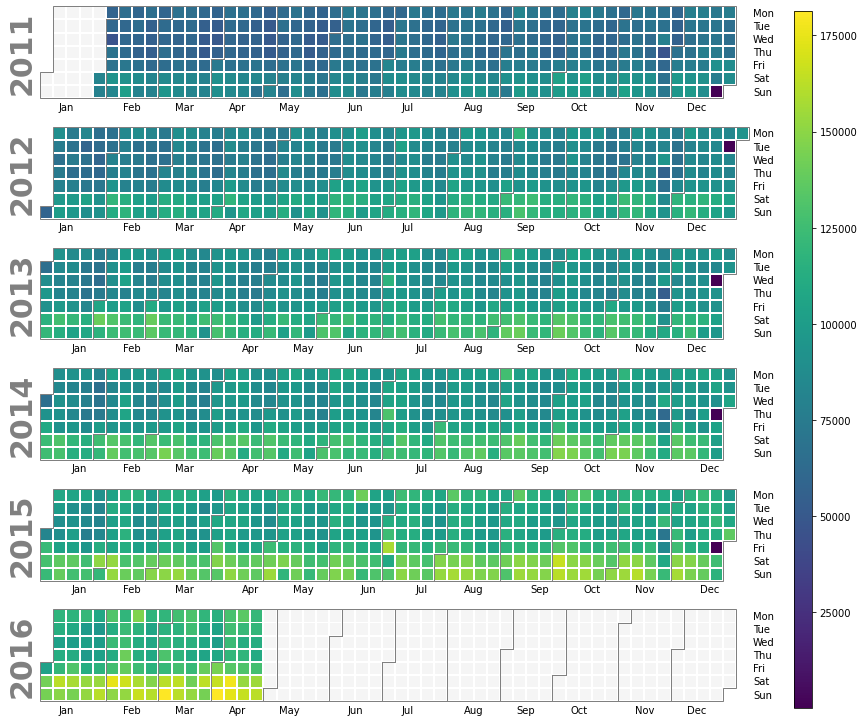

In [ ]:
all_day=pd.date_range('29/01/2011', periods=1913, freq='D')
day = np.array(all_day)
event=pd.Series(np.array(day_rev['revenue'].to_list()),index=day)
calplot.calplot(event)

The heatmap indicated two thing :
1. Weekends are having most sales than anyday of any month in any year which inturn gives most revenue.
2. Their is a visble gradient litening after every passing year showing that revenue of the company increased through every year.
